## Face Mask Classififcation using VGG19.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model,load_model
from keras.layers import Input,Lambda, Dense,Flatten
from keras.applications.vgg19 import VGG19
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import image,ImageDataGenerator
from keras.models import Sequential
%matplotlib inline

In [68]:
img_size = [140,140] # setting image dimensions.

In [70]:
vgg = VGG19(input_shape = img_size+[3],weights = 'imagenet',include_top = False) # creating vgg object.

In [71]:
for i in vgg.layers:     # disabling vgg layers for training.
    i.trainable = False

In [72]:
x = Flatten()(vgg.output) # adding the flatlining layer.

In [73]:
pred = Dense(1,activation = 'sigmoid')(x) # final output layer.

In [74]:
model = Model(inputs = vgg.input, outputs = pred ) # setting model inputs and outputs.

In [75]:
model.summary() # checking the architecture.

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 140, 140, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 140, 140, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 140, 140, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 70, 70, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 70, 70, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 70, 70, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 35, 35, 128)       0   

In [76]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # compiling the model.

### NOTE: you can tune the parameters to achieve even better results as per your choice.

In [77]:
train_gen = ImageDataGenerator(rescale = 1./255,       # augmenting training images.
                              zoom_range = 0.3,
                              shear_range = 0.3,
                              rotation_range = 90,
                              horizontal_flip = True,
                              vertical_flip = True)

In [78]:
test_gen =  ImageDataGenerator(rescale = 1./255)    # normalizing test images.

In [79]:
tr_set = train_gen.flow_from_directory('dataset/train',          
                                      target_size = (140,140),   # getting training images.
                                      batch_size = 16,
                                       class_mode = 'binary')

Found 3068 images belonging to 2 classes.


In [80]:
tx_set = test_gen.flow_from_directory('dataset/train',
                                      target_size = (140,140),   # gettting testing images.
                                      batch_size = 16,
                                       class_mode = 'binary')

Found 3068 images belonging to 2 classes.


In [81]:
history = model.fit_generator(tr_set,                   # begining of the training.
                          validation_data=tx_set,
                         epochs = 5,
                         steps_per_epoch = len(tr_set),
                         validation_steps = len(tx_set))

Epoch 1/5
101/192 [==============>...............] - ETA: 27s - loss: 0.3504 - accuracy: 0.8567

C:\Users\prath\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


192/192 [==============================] - 115s 600ms/step - loss: 0.2771 - accuracy: 0.8934 - val_loss: 0.0604 - val_accuracy: 0.9566
Epoch 2/5
192/192 [==============================] - 116s 603ms/step - loss: 0.1725 - accuracy: 0.9342 - val_loss: 0.0346 - val_accuracy: 0.9654
Epoch 3/5
192/192 [==============================] - 116s 603ms/step - loss: 0.1394 - accuracy: 0.9482 - val_loss: 0.0145 - val_accuracy: 0.9684
Epoch 4/5
192/192 [==============================] - 116s 603ms/step - loss: 0.1295 - accuracy: 0.9505 - val_loss: 0.4081 - val_accuracy: 0.9648
Epoch 5/5
192/192 [==============================] - 116s 604ms/step - loss: 0.1171 - accuracy: 0.9566 - val_loss: 0.0086 - val_accuracy: 0.9671


In [82]:
model.evaluate(tx_set) # evaluating the model against test dataset.

192/192 [==============================] - 58s 301ms/step


[0.002762029180303216, 0.9670795202255249]

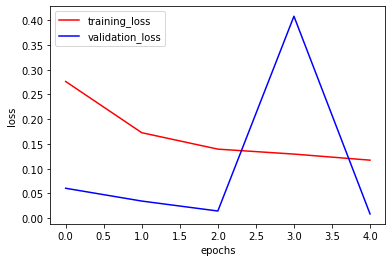

In [83]:
plt.plot(history.history['loss'],'r',label = 'training_loss')   # plotting the training loss graph.
plt.plot(history.history['val_loss'],'b',label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

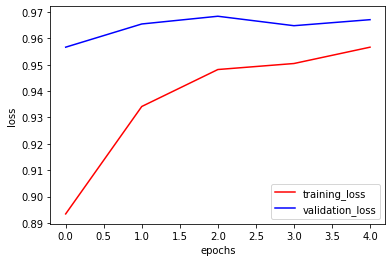

In [84]:
plt.plot(history.history['accuracy'],'r',label = 'training_loss')  # plotting the training accuracy graph.
plt.plot(history.history['val_accuracy'],'b',label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [85]:
#model.save('my_trained.h5') # saving the model.

In [86]:
#tr_set.class_indices # getting the class indices.

In [87]:
'''
tes_img = image.load_img('D:\\Users\\Prathmesh\\Documents\\Untitled Folder\\MiniPro7-FM2\\dataset\\test\\with_mask\\with_mask444.jpg', target_size = (140,140))
tes_img = image.img_to_array(tes_img)
tes_img = np.expand_dims(tes_img,axis = 0)
y_hat = model.predict(tes_img)   # checking the out the results on an image from test data.
'''

"\ntes_img = image.load_img('D:\\Users\\Prathmesh\\Documents\\Untitled Folder\\MiniPro7-FM2\\dataset\\test\\with_mask\\with_mask444.jpg', target_size = (140,140))\ntes_img = image.img_to_array(tes_img)\ntes_img = np.expand_dims(tes_img,axis = 0)\ny_hat = model.predict(tes_img)   # testing out the results.\n"

In [ ]:
#y_hat